In [61]:
from sklearn.model_selection import train_test_split

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
#sys.setrecursionlimit(2000)
import sys
sys.setrecursionlimit(2000)

In [63]:
df=pd.read_csv('Desktop/datazs.csv')

In [64]:
df1=df.drop('Unnamed: 0',axis=1)
df1

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.000
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.000
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.400
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.000
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.000
5,244.0,-145.0,-11.0,9.0,3.0,0.0,2000-01,32.0,34.0,0.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.000
6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.400
7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.000
8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.000
9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [65]:
df1['type_of_combined_shot'].fillna(df1['type_of_shot'],inplace=True)

In [66]:
df1.isnull().sum()
df1.drop('type_of_shot',axis=1,inplace=True)

In [67]:
df1['power_of_shot'].fillna(df1['power_of_shot.1'],inplace=True)
df1['distance_of_shot'].fillna(df1['distance_of_shot.1'],inplace=True)

In [91]:
df1['area_of_shot'].fillna(method='ffill', inplace = True)
df1['shot_basics'].fillna(method='ffill', inplace = True)
df1['range_of_shot'].fillna(method='ffill', inplace = True)
df1['game_season'].fillna(method='ffill', inplace = True)
df1['home/away'].fillna(method='ffill', inplace = True)
df1['team_name'].fillna(method='ffill', inplace = True)
df1['remaining_min'].fillna(method='ffill', inplace = True)
df1['remaining_sec'].fillna(method='ffill', inplace = True)
df1['power_of_shot'].fillna(method='ffill', inplace = True)
df1['distance_of_shot'].fillna(method='ffill', inplace = True)
df1['date_of_game'].fillna(method='ffill', inplace = True)
df1['location_x'].fillna(method='ffill', inplace = True)
df1['location_y'].fillna(method='bfill', inplace = True)
df1['knockout_match'].fillna(method='ffill', inplace = True)

KeyError: 'team_name'

In [69]:
df1.drop(['team_id','match_id','match_event_id','lat/lng','remaining_min.1','remaining_sec.1','power_of_shot.1','knockout_match.1','distance_of_shot.1'],inplace=True,axis=1)

In [70]:
df1.drop(['team_name'],axis=1,inplace=True)

In [71]:
df2=df1

In [72]:
test_set = df2[df2.is_goal.isnull()]

#test_set.drop('is_goal',axis=1,inplace=True)
#data = test_set[test_set['shot_id_number'].notnull()]

x=test_set[['shot_id_number','is_goal']]
#test_set.columns
test_set
x

,shot_id_number,is_goal
0,1,NaN
7,8,NaN
16,17,NaN
19,20,NaN
21,22,NaN
32,33,NaN
33,34,NaN
34,35,NaN
35,36,NaN
36,37,NaN


In [73]:
test_set.drop('is_goal',axis=1,inplace=True)

C:\Users\khwaja wisal\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [74]:
df2.dropna(subset=['is_goal'],inplace=True)

In [75]:
y=df2['is_goal']

In [76]:
df2.drop('is_goal',axis=1,inplace=True)

In [77]:
X=df2
y

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
6        1.0
8        1.0
9        0.0
10       0.0
11       1.0
12       1.0
13       0.0
14       0.0
15       0.0
17       1.0
18       0.0
20       0.0
22       1.0
23       1.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       1.0
31       0.0
38       1.0
39       1.0
40       0.0
        ... 
30657    1.0
30658    0.0
30660    0.0
30661    1.0
30662    0.0
30663    0.0
30665    0.0
30666    0.0
30667    0.0
30669    0.0
30670    0.0
30671    0.0
30672    1.0
30673    0.0
30674    1.0
30675    0.0
30676    1.0
30677    0.0
30678    0.0
30683    0.0
30684    0.0
30685    0.0
30688    1.0
30689    0.0
30690    0.0
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: is_goal, Length: 24429, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size = 0.2, random_state = 0)

In [82]:
model = CatBoostClassifier(iterations=1500, learning_rate=0.08, l2_leaf_reg=3.5, depth=9, rsm=0.98, loss_function= 'Logloss',use_best_model=True,random_seed=42)

In [86]:
cate_features_index1 = np.where(df2.dtypes != float)
cate_features_index1

(array([ 5,  8,  9, 10, 11, 12, 13, 14], dtype=int64),)

In [87]:
#model.fit(X_train,y_train,)
model.fit(X_train,y_train,cat_features=cate_features_index1,eval_set=(X_test,y_test))

CatboostError: Invalid cat_features type=<class 'tuple'>: must be list() or np.ndarray().

In [31]:
df1

,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,type_of_combined_shot
1,10.0,1.0,0.0,2000-01,22.0,35.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,31-10-2000,MANU @ POR,2,shot - 45
2,7.0,1.0,0.0,2000-01,45.0,36.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,31-10-2000,MANU @ POR,3,shot - 25
3,6.0,1.0,0.0,2000-01,52.0,42.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,31-10-2000,MANU @ POR,4,shot - 3
4,6.0,2.0,0.0,2000-01,19.0,20.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,31-10-2000,MANU @ POR,5,shot - 1
5,9.0,3.0,0.0,2000-01,32.0,34.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,31-10-2000,MANU @ POR,6,shot - 17
6,8.0,3.0,0.0,2000-01,52.0,20.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,31-10-2000,MANU @ POR,7,shot - 4
8,6.0,3.0,0.0,2000-01,12.0,32.0,Left Side(L),Goal Line,8-16 ft.,Manchester United,31-10-2000,MANU @ POR,9,shot - 36
9,3.0,3.0,0.0,2000-01,36.0,32.0,Center(C),Goal Line,8-16 ft.,Manchester United,31-10-2000,MANU @ POR,10,shot - 44
10,1.0,3.0,0.0,2000-01,56.0,45.0,Left Side Center(LC),Penalty Spot,24+ ft.,Manchester United,31-10-2000,MANU @ POR,11,shot - 7
11,11.0,1.0,0.0,2000-01,0.0,37.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,01-11-2000,MANU vs. UTA,12,shot - 3


In [92]:
df2.isnull().sum()
df2['location_x'].fillna(method='ffill', inplace = True)
df2['location_y'].fillna(method='bfill', inplace = True)

In [93]:
sample_train = df2['area_of_shot'],y

## Mean encoding 
x = sample_train.groupby(['area_of_shot'])['is_goal'].sum().reset_index()
x = x.rename(columns={"is_goal" : "area_shot_sum"})

y = sample_train.groupby(['area_of_shot'])['is_goal'].count().reset_index()
y = y.rename(columns={"is_goal" : "is_goal_count"})

z = pd.merge(x,y,on = 'area_of_shot',how = 'inner')
z['Target_Encoded_over_areashot'] = z['area_shot_sum']/z['is_goal_count']
z.head()
#Title	Title_Survived_sum	Title_Survived_count	

KeyError: "['is_goal'] not in index"

In [204]:
z = z[['area_of_shot','Target_Encoded_over_areashot']]

sample_train = pd.merge(sample_train,z,on = 'area_of_shot',how = 'left')
sample_train.isnull().sum()

area_of_shot                       0
is_goal                         6268
Target_Encoded_over_areashot       0
dtype: int64

In [205]:
sample_train.drop('area_of_shot',inplace=True,axis=1)

In [206]:
df1['area_of_shot']=sample_train['Target_Encoded_over_areashot']

# 

In [207]:
df1.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
date_of_game                0
home/away                   0
shot_id_number              0
type_of_combined_shot       0
dtype: int64

In [209]:
sample_train1 = df1[['shot_basics','is_goal']]

## Mean encoding 
x1 = sample_train1.groupby(['shot_basics'])['is_goal'].sum().reset_index()
x1 = x1.rename(columns={"is_goal" : "shot_basics_sum"})

y1 = sample_train1.groupby(['shot_basics'])['is_goal'].count().reset_index()
y1 = y1.rename(columns={"is_goal" : "is_goal_count1"})

z1 = pd.merge(x1,y1,on = 'shot_basics',how = 'inner')
z1['Target_Encoded_over_shotbasics'] = z1['shot_basics_sum']/z1['is_goal_count1']
z1
#Title	Title_Survived_sum	Title_Survived_count	

,shot_basics,shot_basics_sum,is_goal_count1,Target_Encoded_over_shotbasics
0,Goal Area,3429.0,5633,0.608734
1,Goal Line,1683.0,3713,0.453272
2,Left Corner,85.0,227,0.374449
3,Mid Ground Line,4.0,61,0.065574
4,Mid Range,4058.0,9997,0.405922
5,Penalty Spot,1512.0,4473,0.338028
6,Right Corner,108.0,325,0.332308


In [210]:
z1 = z1[['shot_basics','Target_Encoded_over_shotbasics']]

sample_train1 = pd.merge(sample_train1,z1,on = 'shot_basics',how = 'left')
sample_train1.head()

,shot_basics,is_goal,Target_Encoded_over_shotbasics
0,Mid Range,NaN,0.405922
1,Mid Range,0.0,0.405922
2,Mid Range,1.0,0.405922
3,Mid Range,0.0,0.405922
4,Goal Area,1.0,0.608734


In [211]:
df1['shot_basics']=sample_train1['Target_Encoded_over_shotbasics']

# 

In [212]:
df1.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
date_of_game                0
home/away                   0
shot_id_number              0
type_of_combined_shot       0
dtype: int64

In [213]:
sample_train1 = df1[['range_of_shot','is_goal']]

## Mean encoding 
x1 = sample_train1.groupby(['range_of_shot'])['is_goal'].sum().reset_index()
x1 = x1.rename(columns={"is_goal" : "range_sum"})

y1 = sample_train1.groupby(['range_of_shot'])['is_goal'].count().reset_index()
y1 = y1.rename(columns={"is_goal" : "is_goal_count1"})

z1 = pd.merge(x1,y1,on = 'range_of_shot',how = 'inner')
z1['Target_Encoded_over_range'] = z1['range_sum']/z1['is_goal_count1']
z1
#Title	Title_Survived_sum	Title_Survived_count	

,range_of_shot,range_sum,is_goal_count1,Target_Encoded_over_range
0,16-24 ft.,2627.0,6550,0.401069
1,24+ ft.,1686.0,4978,0.338690
2,8-16 ft.,2328.0,5370,0.433520
3,Back Court Shot,6.0,76,0.078947
4,Less Than 8 ft.,4232.0,7455,0.567673


In [214]:
z1 = z1[['range_of_shot','Target_Encoded_over_range']]

sample_train1 = pd.merge(sample_train1,z1,on = 'range_of_shot',how = 'left')
sample_train1.head()

,range_of_shot,is_goal,Target_Encoded_over_range
0,16-24 ft.,NaN,0.401069
1,8-16 ft.,0.0,0.433520
2,16-24 ft.,1.0,0.401069
3,16-24 ft.,0.0,0.401069
4,Less Than 8 ft.,1.0,0.567673


In [215]:
df1['range_of_shot']=sample_train1['Target_Encoded_over_range']

In [216]:
df1.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
date_of_game                0
home/away                   0
shot_id_number              0
type_of_combined_shot       0
dtype: int64

In [217]:
sample_train1 = df1[['game_season','is_goal']]

## Mean encoding 
x1 = sample_train1.groupby(['game_season'])['is_goal'].sum().reset_index()
x1 = x1.rename(columns={"is_goal" : "season_sum"})

y1 = sample_train1.groupby(['game_season'])['is_goal'].count().reset_index()
y1 = y1.rename(columns={"is_goal" : "is_goal_count1"})

z1 = pd.merge(x1,y1,on = 'game_season',how = 'inner')
z1['Target_Encoded_over_season'] = z1['season_sum']/z1['is_goal_count1']
z1
#Title	Title_Survived_sum	Title_Survived_count	

,game_season,season_sum,is_goal_count1,Target_Encoded_over_season
0,1996-97,153.0,361,0.423823
1,1997-98,328.0,767,0.427640
2,1998-99,333.0,722,0.461219
3,1999-00,572.0,1243,0.460177
4,2000-01,698.0,1500,0.465333
5,2001-02,746.0,1634,0.456548
6,2002-03,773.0,1763,0.438457
7,2003-04,563.0,1292,0.435759
8,2004-05,466.0,1068,0.436330
9,2005-06,822.0,1819,0.451897


In [218]:
    z1 = z1[['game_season','Target_Encoded_over_season']]

    sample_train1 = pd.merge(sample_train1,z1,on = 'game_season',how = 'left')
    sample_train1.head()

,game_season,is_goal,Target_Encoded_over_season
0,2000-01,NaN,0.465333
1,2000-01,0.0,0.465333
2,2000-01,1.0,0.465333
3,2000-01,0.0,0.465333
4,2000-01,1.0,0.465333


In [219]:
df1['game_season']=sample_train1['Target_Encoded_over_season']

In [220]:
df1

,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,type_of_combined_shot
0,10.0,1.0,0.0,0.465333,27.0,38.0,NaN,0.401907,0.405922,0.401069,Manchester United,31-10-2000,MANU @ POR,1,shot - 30
1,10.0,1.0,0.0,0.465333,22.0,35.0,0.0,0.396063,0.405922,0.433520,Manchester United,31-10-2000,MANU @ POR,2,shot - 45
2,7.0,1.0,0.0,0.465333,45.0,36.0,1.0,0.374063,0.405922,0.401069,Manchester United,31-10-2000,MANU @ POR,3,shot - 25
3,6.0,1.0,0.0,0.465333,52.0,42.0,0.0,0.384269,0.405922,0.401069,Manchester United,31-10-2000,MANU @ POR,4,shot - 3
4,6.0,2.0,0.0,0.465333,19.0,20.0,1.0,0.519511,0.608734,0.567673,Manchester United,31-10-2000,MANU @ POR,5,shot - 1
5,9.0,3.0,0.0,0.465333,32.0,34.0,0.0,0.396063,0.405922,0.433520,Manchester United,31-10-2000,MANU @ POR,6,shot - 17
6,8.0,3.0,0.0,0.465333,52.0,20.0,1.0,0.519511,0.608734,0.567673,Manchester United,31-10-2000,MANU @ POR,7,shot - 4
7,8.0,3.0,0.0,0.465333,5.0,22.0,NaN,0.519511,0.608734,0.567673,Manchester United,31-10-2000,MANU @ POR,8,shot - 3
8,6.0,3.0,0.0,0.465333,12.0,32.0,1.0,0.396063,0.453272,0.433520,Manchester United,31-10-2000,MANU @ POR,9,shot - 36
9,3.0,3.0,0.0,0.465333,36.0,32.0,0.0,0.519511,0.453272,0.433520,Manchester United,31-10-2000,MANU @ POR,10,shot - 44


In [221]:
sample_train1 = df1[['type_of_combined_shot','is_goal']]

## Mean encoding 
x1 = sample_train1.groupby(['type_of_combined_shot'])['is_goal'].sum().reset_index()
x1 = x1.rename(columns={"is_goal" : "shot_sum"})

y1 = sample_train1.groupby(['type_of_combined_shot'])['is_goal'].count().reset_index()
y1 = y1.rename(columns={"is_goal" : "is_goal_count1"})

z1 = pd.merge(x1,y1,on = 'type_of_combined_shot',how = 'inner')
z1['Target_Encoded_over_shot'] = z1['shot_sum']/z1['is_goal_count1']
z1
#Title	Title_Survived_sum	Title_Survived_count	

,type_of_combined_shot,shot_sum,is_goal_count1,Target_Encoded_over_shot
0,shot - 0,86.0,156,0.551282
1,shot - 1,522.0,641,0.814353
2,shot - 10,69.0,170,0.405882
3,shot - 11,43.0,111,0.387387
4,shot - 12,195.0,292,0.667808
5,shot - 13,35.0,125,0.280000
6,shot - 14,37.0,118,0.313559
7,shot - 15,292.0,554,0.527076
8,shot - 16,62.0,143,0.433566
9,shot - 17,177.0,306,0.578431


In [222]:
z1 = z1[['type_of_combined_shot','Target_Encoded_over_shot']]

sample_train1 = pd.merge(sample_train1,z1,on = 'type_of_combined_shot',how = 'left')
sample_train1.head()

,type_of_combined_shot,is_goal,Target_Encoded_over_shot
0,shot - 30,NaN,0.275000
1,shot - 45,0.0,0.311475
2,shot - 25,1.0,0.267241
3,shot - 3,0.0,0.392126
4,shot - 1,1.0,0.814353


In [223]:
df1['type_of_combined_shot']=sample_train1['Target_Encoded_over_shot']

In [226]:
df1.to_csv('Desktop/datanew.csv')

In [107]:
df1.drop(['team_name','date_of_game'],inplace=True,axis=1)

In [130]:
df1.drop('home/away',axis=1,inplace=True)

In [229]:
df4=pd.read_csv('Desktop/datanew.csv')

In [230]:
df4

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,type_of_combined_shot
0,0,10,1.0,0,0.465333,27,38.0,NaN,0.401907,0.405922,0.401069,Manchester United,31-10-2000,1,1,0.275000
1,1,10,1.0,0,0.465333,22,35.0,0.0,0.396063,0.405922,0.433520,Manchester United,31-10-2000,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,1.0,0.374063,0.405922,0.401069,Manchester United,31-10-2000,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.0,0.384269,0.405922,0.401069,Manchester United,31-10-2000,1,4,0.392126
4,4,6,2.0,0,0.465333,19,20.0,1.0,0.519511,0.608734,0.567673,Manchester United,31-10-2000,1,5,0.814353
5,5,9,3.0,0,0.465333,32,34.0,0.0,0.396063,0.405922,0.433520,Manchester United,31-10-2000,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,1.0,0.519511,0.608734,0.567673,Manchester United,31-10-2000,1,7,0.602530
7,7,8,3.0,0,0.465333,5,22.0,NaN,0.519511,0.608734,0.567673,Manchester United,31-10-2000,1,8,0.392126
8,8,6,3.0,0,0.465333,12,32.0,1.0,0.396063,0.453272,0.433520,Manchester United,31-10-2000,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.0,0.519511,0.453272,0.433520,Manchester United,31-10-2000,1,10,0.677618


In [233]:
test_set = df4[df4.is_goal.isnull()]

#test_set.drop('is_goal',axis=1,inplace=True)
#data = test_set[test_set['shot_id_number'].notnull()]

x=test_set[['shot_id_number','is_goal']]
test_set.dtypes


Unnamed: 0                 int64
remaining_min              int64
power_of_shot            float64
knockout_match             int64
game_season              float64
remaining_sec              int64
distance_of_shot         float64
is_goal                  float64
area_of_shot             float64
shot_basics              float64
range_of_shot            float64
team_name                 object
date_of_game              object
home/away                  int64
shot_id_number             int64
type_of_combined_shot    float64
dtype: object

In [237]:
#df4.dropna(subset=['is_goal'],inplace=True)
df4.isnull().sum()
y=df4['is_goal']
df4.drop('is_goal',axis=1,inplace=True)

In [241]:
#df4.drop(['team_name','date_of_game'],axis=1,inplace=True)
df4

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126
4,4,6,2.0,0,0.465333,19,20.0,0.519511,0.608734,0.567673,1,5,0.814353
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126


In [242]:
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size = 0.15, random_state = 0)

In [243]:
from sklearn.feature_selection import RFECV
df1.isnull().sum()

remaining_min               0
power_of_shot               0
knockout_match              0
game_season                 0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
team_name                   0
date_of_game                0
home/away                   0
shot_id_number              0
type_of_combined_shot       0
dtype: int64

In [245]:
#using rfecv from feature_selection to see the fetaure importances to optimize our dataset
from sklearn.ensemble import RandomForestClassifier
clf_rf_4 =CatBoostClassifier(iterations=500, learning_rate=0.08, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',random_seed=42)
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

0:	learn: 0.6233219	total: 30.4ms	remaining: 15.2s
1:	learn: 0.6331949	total: 131ms	remaining: 32.5s
2:	learn: 0.6327735	total: 228ms	remaining: 37.7s
3:	learn: 0.6321715	total: 329ms	remaining: 40.8s
4:	learn: 0.6321113	total: 424ms	remaining: 42s
5:	learn: 0.6337969	total: 531ms	remaining: 43.8s
6:	learn: 0.6356631	total: 633ms	remaining: 44.6s
7:	learn: 0.6366865	total: 725ms	remaining: 44.6s
8:	learn: 0.6366865	total: 822ms	remaining: 44.8s
9:	learn: 0.6373487	total: 913ms	remaining: 44.7s
10:	learn: 0.6379508	total: 1.03s	remaining: 45.8s
11:	learn: 0.6381314	total: 1.14s	remaining: 46.3s
12:	learn: 0.6376498	total: 1.24s	remaining: 46.6s
13:	learn: 0.6383722	total: 1.34s	remaining: 46.5s
14:	learn: 0.6383120	total: 1.4s	remaining: 45.3s
15:	learn: 0.6388538	total: 1.51s	remaining: 45.6s
16:	learn: 0.6387936	total: 1.59s	remaining: 45.1s
17:	learn: 0.6389140	total: 1.69s	remaining: 45.2s
18:	learn: 0.6394558	total: 1.78s	remaining: 45s
19:	learn: 0.6394558	total: 1.84s	remaining: 

161:	learn: 0.6483053	total: 13.9s	remaining: 29.1s
162:	learn: 0.6483655	total: 14s	remaining: 29s
163:	learn: 0.6483655	total: 14.1s	remaining: 28.8s
164:	learn: 0.6483655	total: 14.2s	remaining: 28.8s
165:	learn: 0.6483655	total: 14.2s	remaining: 28.7s
166:	learn: 0.6487267	total: 14.3s	remaining: 28.6s
167:	learn: 0.6487267	total: 14.4s	remaining: 28.5s
168:	learn: 0.6489074	total: 14.5s	remaining: 28.4s
169:	learn: 0.6487267	total: 14.6s	remaining: 28.4s
170:	learn: 0.6488471	total: 14.7s	remaining: 28.3s
171:	learn: 0.6488471	total: 14.8s	remaining: 28.2s
172:	learn: 0.6487869	total: 14.9s	remaining: 28.1s
173:	learn: 0.6486063	total: 15s	remaining: 28.1s
174:	learn: 0.6486063	total: 15s	remaining: 27.9s
175:	learn: 0.6492084	total: 15.1s	remaining: 27.8s
176:	learn: 0.6493890	total: 15.2s	remaining: 27.8s
177:	learn: 0.6499308	total: 15.3s	remaining: 27.7s
178:	learn: 0.6496298	total: 15.4s	remaining: 27.6s
179:	learn: 0.6496900	total: 15.5s	remaining: 27.6s
180:	learn: 0.649690

322:	learn: 0.6548673	total: 29.3s	remaining: 16.1s
323:	learn: 0.6548673	total: 29.4s	remaining: 16s
324:	learn: 0.6553489	total: 29.5s	remaining: 15.9s
325:	learn: 0.6552887	total: 29.6s	remaining: 15.8s
326:	learn: 0.6552285	total: 29.7s	remaining: 15.7s
327:	learn: 0.6552285	total: 29.9s	remaining: 15.7s
328:	learn: 0.6552887	total: 30s	remaining: 15.6s
329:	learn: 0.6552887	total: 30.1s	remaining: 15.5s
330:	learn: 0.6552285	total: 30.2s	remaining: 15.4s
331:	learn: 0.6554693	total: 30.3s	remaining: 15.3s
332:	learn: 0.6555897	total: 30.3s	remaining: 15.2s
333:	learn: 0.6557101	total: 30.4s	remaining: 15.1s
334:	learn: 0.6557101	total: 30.5s	remaining: 15s
335:	learn: 0.6556499	total: 30.6s	remaining: 15s
336:	learn: 0.6557101	total: 30.7s	remaining: 14.9s
337:	learn: 0.6559509	total: 30.8s	remaining: 14.8s
338:	learn: 0.6558305	total: 31s	remaining: 14.7s
339:	learn: 0.6560111	total: 31.1s	remaining: 14.6s
340:	learn: 0.6557703	total: 31.2s	remaining: 14.5s
341:	learn: 0.6558305	

481:	learn: 0.6597435	total: 45.4s	remaining: 1.69s
482:	learn: 0.6597435	total: 45.5s	remaining: 1.6s
483:	learn: 0.6597435	total: 45.6s	remaining: 1.5s
484:	learn: 0.6596833	total: 45.6s	remaining: 1.41s
485:	learn: 0.6596833	total: 45.8s	remaining: 1.32s
486:	learn: 0.6597435	total: 45.8s	remaining: 1.22s
487:	learn: 0.6597435	total: 46s	remaining: 1.13s
488:	learn: 0.6597435	total: 46.1s	remaining: 1.03s
489:	learn: 0.6597435	total: 46.2s	remaining: 942ms
490:	learn: 0.6597435	total: 46.3s	remaining: 848ms
491:	learn: 0.6601650	total: 46.4s	remaining: 755ms
492:	learn: 0.6603456	total: 46.6s	remaining: 661ms
493:	learn: 0.6603456	total: 46.7s	remaining: 567ms
494:	learn: 0.6603456	total: 46.7s	remaining: 472ms
495:	learn: 0.6603456	total: 46.8s	remaining: 378ms
496:	learn: 0.6603456	total: 46.9s	remaining: 283ms
497:	learn: 0.6604058	total: 47s	remaining: 189ms
498:	learn: 0.6602252	total: 47.1s	remaining: 94.4ms
499:	learn: 0.6602252	total: 47.2s	remaining: 0us
0:	learn: 0.6303654

145:	learn: 0.6496298	total: 12.4s	remaining: 29.9s
146:	learn: 0.6495696	total: 12.5s	remaining: 29.9s
147:	learn: 0.6498104	total: 12.5s	remaining: 29.8s
148:	learn: 0.6498104	total: 12.6s	remaining: 29.7s
149:	learn: 0.6501716	total: 12.7s	remaining: 29.6s
150:	learn: 0.6501716	total: 12.8s	remaining: 29.5s
151:	learn: 0.6503522	total: 12.8s	remaining: 29.4s
152:	learn: 0.6502318	total: 12.9s	remaining: 29.2s
153:	learn: 0.6501114	total: 12.9s	remaining: 29.1s
154:	learn: 0.6505930	total: 13.1s	remaining: 29.1s
155:	learn: 0.6507736	total: 13.1s	remaining: 29s
156:	learn: 0.6507736	total: 13.2s	remaining: 28.9s
157:	learn: 0.6508338	total: 13.3s	remaining: 28.8s
158:	learn: 0.6507736	total: 13.4s	remaining: 28.7s
159:	learn: 0.6513154	total: 13.5s	remaining: 28.7s
160:	learn: 0.6514960	total: 13.6s	remaining: 28.6s
161:	learn: 0.6513756	total: 13.7s	remaining: 28.6s
162:	learn: 0.6513154	total: 13.8s	remaining: 28.4s
163:	learn: 0.6514960	total: 13.8s	remaining: 28.4s
164:	learn: 0.

304:	learn: 0.6571549	total: 27.2s	remaining: 17.4s
305:	learn: 0.6572151	total: 27.3s	remaining: 17.3s
306:	learn: 0.6571549	total: 27.4s	remaining: 17.2s
307:	learn: 0.6571549	total: 27.5s	remaining: 17.1s
308:	learn: 0.6571549	total: 27.6s	remaining: 17s
309:	learn: 0.6571549	total: 27.7s	remaining: 16.9s
310:	learn: 0.6572151	total: 27.7s	remaining: 16.8s
311:	learn: 0.6572753	total: 27.8s	remaining: 16.8s
312:	learn: 0.6573957	total: 27.9s	remaining: 16.7s
313:	learn: 0.6573957	total: 28s	remaining: 16.6s
314:	learn: 0.6574559	total: 28.1s	remaining: 16.5s
315:	learn: 0.6574559	total: 28.2s	remaining: 16.4s
316:	learn: 0.6573957	total: 28.3s	remaining: 16.3s
317:	learn: 0.6573957	total: 28.4s	remaining: 16.2s
318:	learn: 0.6575161	total: 28.5s	remaining: 16.2s
319:	learn: 0.6579977	total: 28.6s	remaining: 16.1s
320:	learn: 0.6580579	total: 28.7s	remaining: 16s
321:	learn: 0.6581783	total: 28.8s	remaining: 15.9s
322:	learn: 0.6581783	total: 28.9s	remaining: 15.8s
323:	learn: 0.6581

463:	learn: 0.6616098	total: 42.8s	remaining: 3.32s
464:	learn: 0.6616098	total: 42.9s	remaining: 3.23s
465:	learn: 0.6616700	total: 43s	remaining: 3.13s
466:	learn: 0.6614894	total: 43.1s	remaining: 3.04s
467:	learn: 0.6615496	total: 43.2s	remaining: 2.95s
468:	learn: 0.6616098	total: 43.3s	remaining: 2.86s
469:	learn: 0.6616700	total: 43.4s	remaining: 2.77s
470:	learn: 0.6616700	total: 43.5s	remaining: 2.68s
471:	learn: 0.6619710	total: 43.6s	remaining: 2.59s
472:	learn: 0.6620312	total: 43.7s	remaining: 2.49s
473:	learn: 0.6619710	total: 43.8s	remaining: 2.4s
474:	learn: 0.6620312	total: 43.9s	remaining: 2.31s
475:	learn: 0.6622118	total: 44s	remaining: 2.22s
476:	learn: 0.6622118	total: 44.1s	remaining: 2.13s
477:	learn: 0.6621516	total: 44.2s	remaining: 2.03s
478:	learn: 0.6622118	total: 44.3s	remaining: 1.94s
479:	learn: 0.6622118	total: 44.4s	remaining: 1.85s
480:	learn: 0.6622118	total: 44.5s	remaining: 1.76s
481:	learn: 0.6620312	total: 44.6s	remaining: 1.67s
482:	learn: 0.662

126:	learn: 0.6443923	total: 10.3s	remaining: 30.2s
127:	learn: 0.6443321	total: 10.3s	remaining: 30s
128:	learn: 0.6450545	total: 10.4s	remaining: 29.9s
129:	learn: 0.6451749	total: 10.5s	remaining: 29.8s
130:	learn: 0.6449341	total: 10.6s	remaining: 29.8s
131:	learn: 0.6446331	total: 10.7s	remaining: 29.7s
132:	learn: 0.6445729	total: 10.7s	remaining: 29.5s
133:	learn: 0.6446933	total: 10.8s	remaining: 29.4s
134:	learn: 0.6448739	total: 10.8s	remaining: 29.3s
135:	learn: 0.6447535	total: 10.9s	remaining: 29s
136:	learn: 0.6449943	total: 11s	remaining: 29.1s
137:	learn: 0.6449943	total: 11s	remaining: 28.9s
138:	learn: 0.6450545	total: 11.1s	remaining: 28.8s
139:	learn: 0.6449341	total: 11.2s	remaining: 28.7s
140:	learn: 0.6451749	total: 11.2s	remaining: 28.5s
141:	learn: 0.6454157	total: 11.3s	remaining: 28.5s
142:	learn: 0.6457167	total: 11.4s	remaining: 28.4s
143:	learn: 0.6455963	total: 11.5s	remaining: 28.3s
144:	learn: 0.6458371	total: 11.5s	remaining: 28.2s
145:	learn: 0.645776

285:	learn: 0.6551683	total: 24.5s	remaining: 18.3s
286:	learn: 0.6552285	total: 24.6s	remaining: 18.2s
287:	learn: 0.6554693	total: 24.7s	remaining: 18.2s
288:	learn: 0.6556499	total: 24.8s	remaining: 18.1s
289:	learn: 0.6556499	total: 24.9s	remaining: 18s
290:	learn: 0.6555295	total: 25s	remaining: 17.9s
291:	learn: 0.6555897	total: 25s	remaining: 17.8s
292:	learn: 0.6555897	total: 25.1s	remaining: 17.7s
293:	learn: 0.6557703	total: 25.2s	remaining: 17.6s
294:	learn: 0.6557703	total: 25.3s	remaining: 17.6s
295:	learn: 0.6557703	total: 25.4s	remaining: 17.5s
296:	learn: 0.6558305	total: 25.5s	remaining: 17.4s
297:	learn: 0.6558305	total: 25.6s	remaining: 17.3s
298:	learn: 0.6558907	total: 25.7s	remaining: 17.3s
299:	learn: 0.6559509	total: 25.8s	remaining: 17.2s
300:	learn: 0.6560111	total: 25.9s	remaining: 17.1s
301:	learn: 0.6560111	total: 25.9s	remaining: 17s
302:	learn: 0.6560111	total: 26s	remaining: 16.9s
303:	learn: 0.6560111	total: 26.1s	remaining: 16.8s
304:	learn: 0.6560111	

445:	learn: 0.6591415	total: 39.9s	remaining: 4.83s
446:	learn: 0.6589007	total: 40s	remaining: 4.74s
447:	learn: 0.6589007	total: 40.1s	remaining: 4.65s
448:	learn: 0.6589007	total: 40.2s	remaining: 4.56s
449:	learn: 0.6589007	total: 40.3s	remaining: 4.47s
450:	learn: 0.6588405	total: 40.4s	remaining: 4.39s
451:	learn: 0.6588405	total: 40.5s	remaining: 4.3s
452:	learn: 0.6585997	total: 40.6s	remaining: 4.21s
453:	learn: 0.6585395	total: 40.8s	remaining: 4.13s
454:	learn: 0.6585997	total: 40.9s	remaining: 4.04s
455:	learn: 0.6586599	total: 41s	remaining: 3.95s
456:	learn: 0.6590211	total: 41.1s	remaining: 3.86s
457:	learn: 0.6590211	total: 41.1s	remaining: 3.77s
458:	learn: 0.6592017	total: 41.2s	remaining: 3.68s
459:	learn: 0.6592017	total: 41.3s	remaining: 3.59s
460:	learn: 0.6592017	total: 41.4s	remaining: 3.5s
461:	learn: 0.6595027	total: 41.5s	remaining: 3.41s
462:	learn: 0.6595027	total: 41.6s	remaining: 3.33s
463:	learn: 0.6595027	total: 41.7s	remaining: 3.24s
464:	learn: 0.6595

106:	learn: 0.6475227	total: 10.1s	remaining: 37.3s
107:	learn: 0.6474625	total: 10.3s	remaining: 37.3s
108:	learn: 0.6474625	total: 10.4s	remaining: 37.2s
109:	learn: 0.6474625	total: 10.4s	remaining: 36.9s
110:	learn: 0.6475227	total: 10.4s	remaining: 36.6s
111:	learn: 0.6474625	total: 10.5s	remaining: 36.4s
112:	learn: 0.6474023	total: 10.5s	remaining: 36.1s
113:	learn: 0.6475227	total: 10.6s	remaining: 36s
114:	learn: 0.6477635	total: 10.7s	remaining: 36s
115:	learn: 0.6477635	total: 10.8s	remaining: 35.9s
116:	learn: 0.6475829	total: 11s	remaining: 35.9s
117:	learn: 0.6477033	total: 11.1s	remaining: 35.9s
118:	learn: 0.6477033	total: 11.2s	remaining: 35.8s
119:	learn: 0.6478237	total: 11.3s	remaining: 35.6s
120:	learn: 0.6478839	total: 11.4s	remaining: 35.6s
121:	learn: 0.6478839	total: 11.4s	remaining: 35.4s
122:	learn: 0.6478237	total: 11.5s	remaining: 35.2s
123:	learn: 0.6479441	total: 11.5s	remaining: 34.9s
124:	learn: 0.6479441	total: 11.5s	remaining: 34.6s
125:	learn: 0.6478

265:	learn: 0.6542050	total: 24.8s	remaining: 21.8s
266:	learn: 0.6540846	total: 24.9s	remaining: 21.7s
267:	learn: 0.6540846	total: 25s	remaining: 21.6s
268:	learn: 0.6541448	total: 25.1s	remaining: 21.5s
269:	learn: 0.6540846	total: 25.2s	remaining: 21.5s
270:	learn: 0.6540846	total: 25.3s	remaining: 21.4s
271:	learn: 0.6550479	total: 25.4s	remaining: 21.3s
272:	learn: 0.6551081	total: 25.4s	remaining: 21.2s
273:	learn: 0.6548673	total: 25.5s	remaining: 21.1s
274:	learn: 0.6549275	total: 25.7s	remaining: 21s
275:	learn: 0.6548071	total: 25.8s	remaining: 20.9s
276:	learn: 0.6546867	total: 25.9s	remaining: 20.8s
277:	learn: 0.6548071	total: 25.9s	remaining: 20.7s
278:	learn: 0.6548071	total: 26s	remaining: 20.6s
279:	learn: 0.6548071	total: 26.1s	remaining: 20.5s
280:	learn: 0.6548071	total: 26.2s	remaining: 20.4s
281:	learn: 0.6548071	total: 26.3s	remaining: 20.3s
282:	learn: 0.6548071	total: 26.4s	remaining: 20.2s
283:	learn: 0.6547469	total: 26.4s	remaining: 20.1s
284:	learn: 0.6548

424:	learn: 0.6579375	total: 40.1s	remaining: 7.08s
425:	learn: 0.6579375	total: 40.3s	remaining: 6.99s
426:	learn: 0.6579375	total: 40.3s	remaining: 6.89s
427:	learn: 0.6579375	total: 40.4s	remaining: 6.79s
428:	learn: 0.6578773	total: 40.4s	remaining: 6.69s
429:	learn: 0.6578773	total: 40.5s	remaining: 6.6s
430:	learn: 0.6579977	total: 40.6s	remaining: 6.51s
431:	learn: 0.6579977	total: 40.7s	remaining: 6.41s
432:	learn: 0.6579977	total: 40.8s	remaining: 6.32s
433:	learn: 0.6580579	total: 40.9s	remaining: 6.22s
434:	learn: 0.6580579	total: 41s	remaining: 6.12s
435:	learn: 0.6579375	total: 41.1s	remaining: 6.03s
436:	learn: 0.6578773	total: 41.2s	remaining: 5.93s
437:	learn: 0.6579977	total: 41.3s	remaining: 5.84s
438:	learn: 0.6579977	total: 41.4s	remaining: 5.75s
439:	learn: 0.6579977	total: 41.5s	remaining: 5.66s
440:	learn: 0.6579977	total: 41.6s	remaining: 5.56s
441:	learn: 0.6578773	total: 41.7s	remaining: 5.47s
442:	learn: 0.6578773	total: 41.8s	remaining: 5.37s
443:	learn: 0.6

86:	learn: 0.6433689	total: 7.86s	remaining: 37.3s
87:	learn: 0.6435495	total: 7.91s	remaining: 37s
88:	learn: 0.6434893	total: 7.94s	remaining: 36.7s
89:	learn: 0.6437903	total: 8.04s	remaining: 36.6s
90:	learn: 0.6436097	total: 8.07s	remaining: 36.3s
91:	learn: 0.6440311	total: 8.17s	remaining: 36.2s
92:	learn: 0.6443923	total: 8.27s	remaining: 36.2s
93:	learn: 0.6444525	total: 8.4s	remaining: 36.3s
94:	learn: 0.6445127	total: 8.43s	remaining: 35.9s
95:	learn: 0.6443923	total: 8.49s	remaining: 35.7s
96:	learn: 0.6445127	total: 8.57s	remaining: 35.6s
97:	learn: 0.6448137	total: 8.67s	remaining: 35.6s
98:	learn: 0.6449341	total: 8.73s	remaining: 35.4s
99:	learn: 0.6449341	total: 8.79s	remaining: 35.2s
100:	learn: 0.6449341	total: 8.81s	remaining: 34.8s
101:	learn: 0.6448137	total: 8.88s	remaining: 34.6s
102:	learn: 0.6449341	total: 8.94s	remaining: 34.5s
103:	learn: 0.6447535	total: 9.04s	remaining: 34.4s
104:	learn: 0.6452351	total: 9.13s	remaining: 34.4s
105:	learn: 0.6454157	total: 

247:	learn: 0.6519174	total: 21.2s	remaining: 21.6s
248:	learn: 0.6519174	total: 21.3s	remaining: 21.4s
249:	learn: 0.6520378	total: 21.4s	remaining: 21.4s
250:	learn: 0.6519174	total: 21.5s	remaining: 21.3s
251:	learn: 0.6522184	total: 21.6s	remaining: 21.2s
252:	learn: 0.6524592	total: 21.7s	remaining: 21.2s
253:	learn: 0.6525194	total: 21.8s	remaining: 21.1s
254:	learn: 0.6526398	total: 21.9s	remaining: 21s
255:	learn: 0.6526398	total: 22s	remaining: 21s
256:	learn: 0.6527000	total: 22.1s	remaining: 20.9s
257:	learn: 0.6526398	total: 22.2s	remaining: 20.8s
258:	learn: 0.6525796	total: 22.3s	remaining: 20.7s
259:	learn: 0.6525796	total: 22.4s	remaining: 20.7s
260:	learn: 0.6526398	total: 22.4s	remaining: 20.6s
261:	learn: 0.6527602	total: 22.5s	remaining: 20.5s
262:	learn: 0.6528204	total: 22.7s	remaining: 20.4s
263:	learn: 0.6527602	total: 22.8s	remaining: 20.3s
264:	learn: 0.6527602	total: 22.9s	remaining: 20.3s
265:	learn: 0.6527602	total: 23s	remaining: 20.2s
266:	learn: 0.652700

407:	learn: 0.6554091	total: 36.7s	remaining: 8.28s
408:	learn: 0.6554091	total: 36.8s	remaining: 8.2s
409:	learn: 0.6554091	total: 36.9s	remaining: 8.11s
410:	learn: 0.6555295	total: 37s	remaining: 8.02s
411:	learn: 0.6555295	total: 37.1s	remaining: 7.93s
412:	learn: 0.6555295	total: 37.2s	remaining: 7.84s
413:	learn: 0.6555295	total: 37.3s	remaining: 7.75s
414:	learn: 0.6554693	total: 37.4s	remaining: 7.67s
415:	learn: 0.6554693	total: 37.5s	remaining: 7.58s
416:	learn: 0.6554693	total: 37.6s	remaining: 7.49s
417:	learn: 0.6554091	total: 37.7s	remaining: 7.4s
418:	learn: 0.6554091	total: 37.8s	remaining: 7.31s
419:	learn: 0.6554693	total: 37.9s	remaining: 7.22s
420:	learn: 0.6554091	total: 38s	remaining: 7.13s
421:	learn: 0.6554091	total: 38.1s	remaining: 7.04s
422:	learn: 0.6554091	total: 38.1s	remaining: 6.94s
423:	learn: 0.6554091	total: 38.2s	remaining: 6.85s
424:	learn: 0.6554091	total: 38.3s	remaining: 6.76s
425:	learn: 0.6554091	total: 38.4s	remaining: 6.67s
426:	learn: 0.6554

68:	learn: 0.6413822	total: 6.38s	remaining: 39.8s
69:	learn: 0.6413220	total: 6.48s	remaining: 39.8s
70:	learn: 0.6415628	total: 6.6s	remaining: 39.9s
71:	learn: 0.6427668	total: 6.71s	remaining: 39.9s
72:	learn: 0.6427668	total: 6.75s	remaining: 39.5s
73:	learn: 0.6428872	total: 6.85s	remaining: 39.5s
74:	learn: 0.6427066	total: 6.95s	remaining: 39.4s
75:	learn: 0.6428270	total: 6.99s	remaining: 39s
76:	learn: 0.6421648	total: 7.09s	remaining: 39s
77:	learn: 0.6431280	total: 7.19s	remaining: 38.9s
78:	learn: 0.6433087	total: 7.29s	remaining: 38.8s
79:	learn: 0.6433087	total: 7.34s	remaining: 38.5s
80:	learn: 0.6437301	total: 7.4s	remaining: 38.3s
81:	learn: 0.6436699	total: 7.49s	remaining: 38.2s
82:	learn: 0.6438505	total: 7.59s	remaining: 38.1s
83:	learn: 0.6433689	total: 7.7s	remaining: 38.1s
84:	learn: 0.6434893	total: 7.8s	remaining: 38.1s
85:	learn: 0.6435495	total: 7.89s	remaining: 38s
86:	learn: 0.6436699	total: 7.99s	remaining: 37.9s
87:	learn: 0.6437301	total: 8.05s	remaini

229:	learn: 0.6488471	total: 20.3s	remaining: 23.8s
230:	learn: 0.6486665	total: 20.4s	remaining: 23.8s
231:	learn: 0.6486665	total: 20.5s	remaining: 23.7s
232:	learn: 0.6486063	total: 20.6s	remaining: 23.6s
233:	learn: 0.6487267	total: 20.7s	remaining: 23.5s
234:	learn: 0.6487267	total: 20.8s	remaining: 23.4s
235:	learn: 0.6487267	total: 20.9s	remaining: 23.4s
236:	learn: 0.6486665	total: 21s	remaining: 23.3s
237:	learn: 0.6487267	total: 21.1s	remaining: 23.2s
238:	learn: 0.6486665	total: 21.2s	remaining: 23.1s
239:	learn: 0.6486665	total: 21.3s	remaining: 23.1s
240:	learn: 0.6487869	total: 21.4s	remaining: 23s
241:	learn: 0.6490278	total: 21.5s	remaining: 22.9s
242:	learn: 0.6489676	total: 21.6s	remaining: 22.8s
243:	learn: 0.6490880	total: 21.7s	remaining: 22.7s
244:	learn: 0.6488471	total: 21.8s	remaining: 22.6s
245:	learn: 0.6487869	total: 21.9s	remaining: 22.6s
246:	learn: 0.6489074	total: 22s	remaining: 22.5s
247:	learn: 0.6489074	total: 22.1s	remaining: 22.4s
248:	learn: 0.6488

388:	learn: 0.6532418	total: 35.4s	remaining: 10.1s
389:	learn: 0.6534224	total: 35.5s	remaining: 10s
390:	learn: 0.6534224	total: 35.7s	remaining: 9.94s
391:	learn: 0.6534224	total: 35.8s	remaining: 9.86s
392:	learn: 0.6534224	total: 35.9s	remaining: 9.77s
393:	learn: 0.6534224	total: 36s	remaining: 9.68s
394:	learn: 0.6534224	total: 36.1s	remaining: 9.59s
395:	learn: 0.6536030	total: 36.2s	remaining: 9.5s
396:	learn: 0.6536030	total: 36.3s	remaining: 9.41s
397:	learn: 0.6534826	total: 36.4s	remaining: 9.32s
398:	learn: 0.6534826	total: 36.5s	remaining: 9.23s
399:	learn: 0.6534826	total: 36.6s	remaining: 9.14s
400:	learn: 0.6534826	total: 36.7s	remaining: 9.05s
401:	learn: 0.6537234	total: 36.8s	remaining: 8.97s
402:	learn: 0.6537234	total: 36.9s	remaining: 8.88s
403:	learn: 0.6536632	total: 37s	remaining: 8.79s
404:	learn: 0.6537836	total: 37.1s	remaining: 8.7s
405:	learn: 0.6537836	total: 37.2s	remaining: 8.61s
406:	learn: 0.6536632	total: 37.3s	remaining: 8.52s
407:	learn: 0.653603

48:	learn: 0.6389140	total: 4.56s	remaining: 42s
49:	learn: 0.6390344	total: 4.61s	remaining: 41.5s
50:	learn: 0.6390344	total: 4.71s	remaining: 41.5s
51:	learn: 0.6389742	total: 4.8s	remaining: 41.4s
52:	learn: 0.6391548	total: 4.85s	remaining: 40.9s
53:	learn: 0.6391548	total: 4.96s	remaining: 40.9s
54:	learn: 0.6389742	total: 5.06s	remaining: 40.9s
55:	learn: 0.6390344	total: 5.1s	remaining: 40.4s
56:	learn: 0.6392752	total: 5.19s	remaining: 40.4s
57:	learn: 0.6395160	total: 5.29s	remaining: 40.3s
58:	learn: 0.6398170	total: 5.38s	remaining: 40.2s
59:	learn: 0.6397568	total: 5.48s	remaining: 40.2s
60:	learn: 0.6398772	total: 5.57s	remaining: 40.1s
61:	learn: 0.6399374	total: 5.66s	remaining: 40s
62:	learn: 0.6398170	total: 5.77s	remaining: 40s
63:	learn: 0.6403588	total: 5.87s	remaining: 40s
64:	learn: 0.6404190	total: 5.97s	remaining: 40s
65:	learn: 0.6411414	total: 6.07s	remaining: 39.9s
66:	learn: 0.6412618	total: 6.17s	remaining: 39.9s
67:	learn: 0.6413220	total: 6.26s	remaining

208:	learn: 0.6471013	total: 17.4s	remaining: 24.2s
209:	learn: 0.6470411	total: 17.5s	remaining: 24.1s
210:	learn: 0.6471013	total: 17.6s	remaining: 24.1s
211:	learn: 0.6471013	total: 17.7s	remaining: 24s
212:	learn: 0.6471615	total: 17.7s	remaining: 23.9s
213:	learn: 0.6471013	total: 17.9s	remaining: 23.9s
214:	learn: 0.6471013	total: 17.9s	remaining: 23.8s
215:	learn: 0.6471013	total: 18s	remaining: 23.7s
216:	learn: 0.6472217	total: 18.1s	remaining: 23.7s
217:	learn: 0.6471013	total: 18.2s	remaining: 23.6s
218:	learn: 0.6472217	total: 18.3s	remaining: 23.5s
219:	learn: 0.6472217	total: 18.4s	remaining: 23.4s
220:	learn: 0.6472819	total: 18.5s	remaining: 23.4s
221:	learn: 0.6473421	total: 18.6s	remaining: 23.3s
222:	learn: 0.6473421	total: 18.7s	remaining: 23.2s
223:	learn: 0.6474023	total: 18.8s	remaining: 23.1s
224:	learn: 0.6475227	total: 18.9s	remaining: 23.1s
225:	learn: 0.6475829	total: 19s	remaining: 23s
226:	learn: 0.6475227	total: 19.1s	remaining: 22.9s
227:	learn: 0.647582

KeyboardInterrupt: 

In [186]:
clf_rf_3 = RandomForestClassifier(n_estimators = 1000,criterion='entropy',random_state=0)
rfecv1 = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv1 = rfecv1.fit(X_train, y_train)

KeyboardInterrupt: 

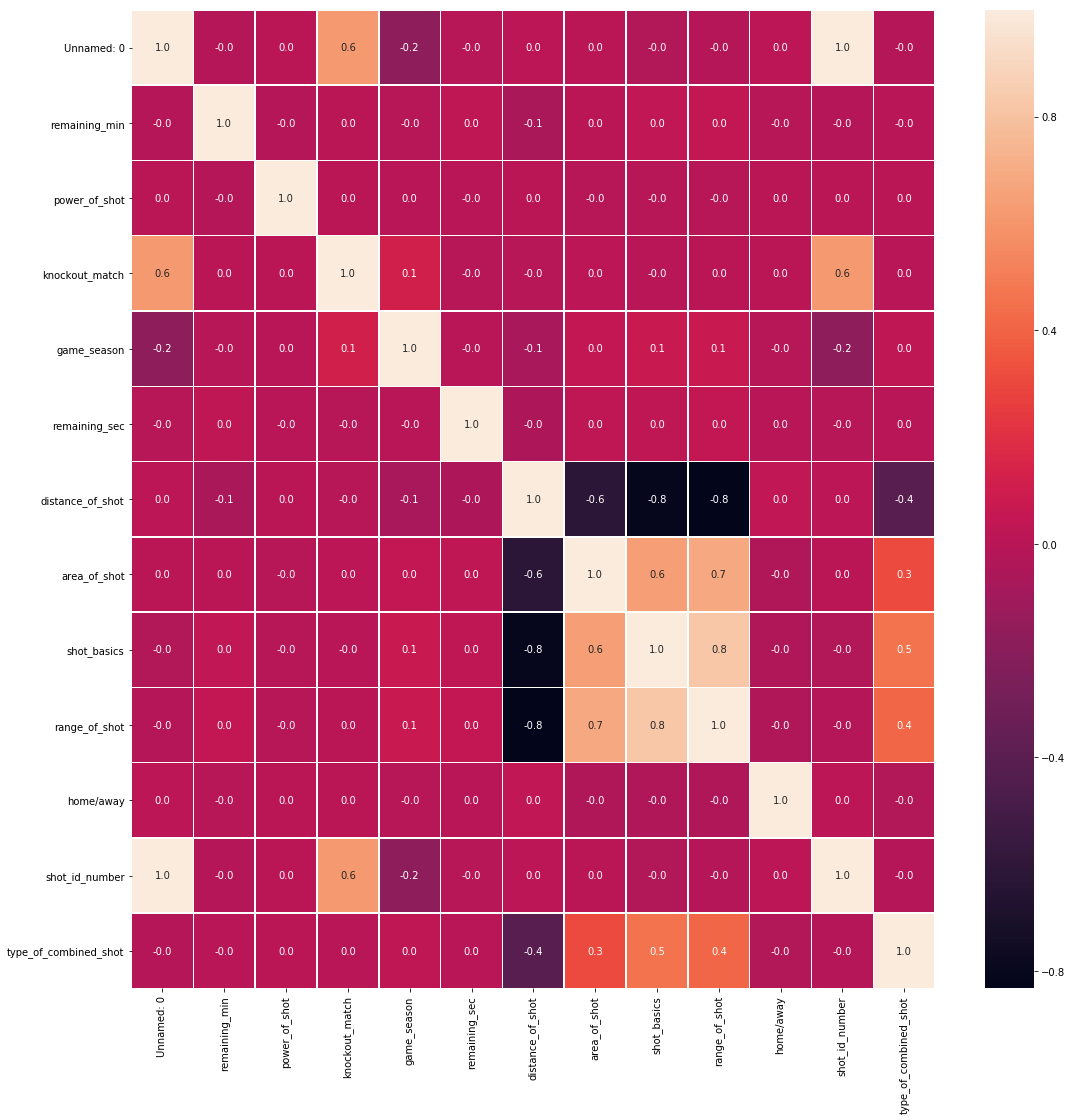

In [248]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df4.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [250]:
df5=df4[['power_of_shot','knockout_match','game_season','distance_of_shot','area_of_shot','shot_basics','range_of_shot','shot_id_number','type_of_combined_shot']]

In [252]:
df5=df5.set_index('shot_id_number')

,power_of_shot,knockout_match,game_season,distance_of_shot,area_of_shot,shot_basics,range_of_shot,type_of_combined_shot
shot_id_number,,,,,,,,
2,1.0,0,0.465333,35.0,0.396063,0.405922,0.433520,0.311475
3,1.0,0,0.465333,36.0,0.374063,0.405922,0.401069,0.267241
4,1.0,0,0.465333,42.0,0.384269,0.405922,0.401069,0.392126
5,2.0,0,0.465333,20.0,0.519511,0.608734,0.567673,0.814353
6,3.0,0,0.465333,34.0,0.396063,0.405922,0.433520,0.578431
7,3.0,0,0.465333,20.0,0.519511,0.608734,0.567673,0.602530
9,3.0,0,0.465333,32.0,0.396063,0.453272,0.433520,0.312860
10,3.0,0,0.465333,32.0,0.519511,0.453272,0.433520,0.677618
11,3.0,0,0.465333,45.0,0.374063,0.338028,0.338690,0.281553


In [328]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(ndf1, y1, test_size = 0.15, random_state = 0)


In [289]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1500,criterion='entropy', random_state = 42)
classifier.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [290]:
ypred=classifier.predict(X_test1)

In [291]:
from sklearn.metrics import accuracy_score
ac_2 = accuracy_score(y_test1,ypred)
print('Accuracy is: ',ac_2)

Accuracy is:  0.5978171896316508


In [329]:
model = CatBoostClassifier(iterations=1500, learning_rate=0.02, l2_leaf_reg=4.5, depth=10, rsm=0.98, loss_function= 'Logloss', eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [300]:
len(X_train1)

20764

In [89]:
#model.fit(X_train,y_train,)
model.fit(X_train,y_train,cat_features=cate_features_index1,eval_set=(X_test,y_test))

CatboostError: Invalid cat_features type=<class 'tuple'>: must be list() or np.ndarray().

In [263]:
clf_rf_3 = RandomForestClassifier(n_estimators = 2000,criterion='entropy',random_state=0)
rfecv1 = RFECV(estimator=clf_rf_3, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv1 = rfecv1.fit(X_train1, y_train1)
print('Optimal number of features :', rfecv1.n_features_)

print('Best features :', X_train1.columns[rfecv1.support_])


Optimal number of features : 1
Best features : Index(['type_of_combined_shot'], dtype='object')


In [302]:
df6=df4[['type_of_combined_shot','distance_of_shot','range_of_shot']]

In [282]:
df6

,type_of_combined_shot,distance_of_shot,area_of_shot
1,0.311475,35.0,0.396063
2,0.267241,36.0,0.374063
3,0.392126,42.0,0.384269
4,0.814353,20.0,0.519511
5,0.578431,34.0,0.396063
6,0.602530,20.0,0.519511
8,0.312860,32.0,0.396063
9,0.677618,32.0,0.519511
10,0.281553,45.0,0.374063
11,0.392126,37.0,0.384269


In [308]:
df4

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126
4,4,6,2.0,0,0.465333,19,20.0,0.519511,0.608734,0.567673,1,5,0.814353
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126


In [310]:
#df = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
df4[(np.abs(stats.zscore(df4)) < 3).all(axis=1)]

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126
12,12,7,1.0,0,0.465333,0,32.0,0.396063,0.453272,0.433520,0,13,0.677618


In [311]:
df4

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126
4,4,6,2.0,0,0.465333,19,20.0,0.519511,0.608734,0.567673,1,5,0.814353
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126


In [312]:
pd.merge

1        0.0
2        1.0
3        0.0
4        1.0
5        0.0
6        1.0
8        1.0
9        0.0
10       0.0
11       1.0
12       1.0
13       0.0
14       0.0
15       0.0
17       1.0
18       0.0
20       0.0
22       1.0
23       1.0
24       1.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       1.0
31       0.0
38       1.0
39       1.0
40       0.0
        ... 
30657    1.0
30658    0.0
30660    0.0
30661    1.0
30662    0.0
30663    0.0
30665    0.0
30666    0.0
30667    0.0
30669    0.0
30670    0.0
30671    0.0
30672    1.0
30673    0.0
30674    1.0
30675    0.0
30676    1.0
30677    0.0
30678    0.0
30683    0.0
30684    0.0
30685    0.0
30688    1.0
30689    0.0
30690    0.0
30691    0.0
30692    0.0
30694    1.0
30695    0.0
30696    0.0
Name: is_goal, Length: 24429, dtype: float64

In [313]:
df4['is_goal']=y

In [314]:
df4

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot,is_goal
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475,0.0
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241,1.0
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126,0.0
4,4,6,2.0,0,0.465333,19,20.0,0.519511,0.608734,0.567673,1,5,0.814353,1.0
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431,0.0
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530,1.0
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860,1.0
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618,0.0
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553,0.0
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126,1.0


In [315]:
#df = pd.DataFrame(np.random.randn(100, 3))

from scipy import stats
df5=df4[(np.abs(stats.zscore(df4)) < 3).all(axis=1)]

In [320]:
y1=df5['is_goal']

In [318]:
ndf=df5.drop('is_goal',axis=1)

In [319]:
ndf

,Unnamed: 0,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,home/away,shot_id_number,type_of_combined_shot
1,1,10,1.0,0,0.465333,22,35.0,0.396063,0.405922,0.433520,1,2,0.311475
2,2,7,1.0,0,0.465333,45,36.0,0.374063,0.405922,0.401069,1,3,0.267241
3,3,6,1.0,0,0.465333,52,42.0,0.384269,0.405922,0.401069,1,4,0.392126
5,5,9,3.0,0,0.465333,32,34.0,0.396063,0.405922,0.433520,1,6,0.578431
6,6,8,3.0,0,0.465333,52,20.0,0.519511,0.608734,0.567673,1,7,0.602530
8,8,6,3.0,0,0.465333,12,32.0,0.396063,0.453272,0.433520,1,9,0.312860
9,9,3,3.0,0,0.465333,36,32.0,0.519511,0.453272,0.433520,1,10,0.677618
10,10,1,3.0,0,0.465333,56,45.0,0.374063,0.338028,0.338690,1,11,0.281553
11,11,11,1.0,0,0.465333,0,37.0,0.384269,0.405922,0.401069,0,12,0.392126
12,12,7,1.0,0,0.465333,0,32.0,0.396063,0.453272,0.433520,0,13,0.677618


In [326]:
ndf.columns

Index(['Unnamed: 0', 'remaining_min', 'power_of_shot', 'knockout_match',
       'game_season', 'remaining_sec', 'distance_of_shot', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'home/away', 'shot_id_number',
       'type_of_combined_shot'],
      dtype='object')

In [327]:
ndf1=ndf[['power_of_shot','knockout_match','game_season','distance_of_shot','home/away','shot_id_number','type_of_combined_shot','shot_basics']]